In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Thesis\data\raw\READING_2016.CSV', sep=';', parse_dates=[3], dtype={'Meetwaarde': np.float64}, decimal=',')
print(len(df))
df.head()

7709842


,Type,InstallatieID,Afname/Injectie,Meter read tijdstip,Eenheid van meetwaarde,Meetwaarde,Status
0,Elektriciteit,K6LUKJZ1B9SiIw,Injectie,01JAN16:00:00:00,Kwh,0.0,VAL
1,Elektriciteit,K6LUKJZ1B9SiIw,Injectie,01JAN16:00:15:00,Kwh,0.0,VAL
2,Elektriciteit,K6LUKJZ1B9SiIw,Injectie,01JAN16:00:30:00,Kwh,0.0,VAL
3,Elektriciteit,K6LUKJZ1B9SiIw,Injectie,01JAN16:00:45:00,Kwh,0.0,VAL
4,Elektriciteit,K6LUKJZ1BtSiJA,Afname,01JAN16:00:00:00,Kwh,0.0,VAL


In [3]:
df['Meter read tijdstip'] = pd.to_datetime(df['Meter read tijdstip'], format="%d%b%y:%H:%M:%S")

<Axes: xlabel='Meter read tijdstip'>

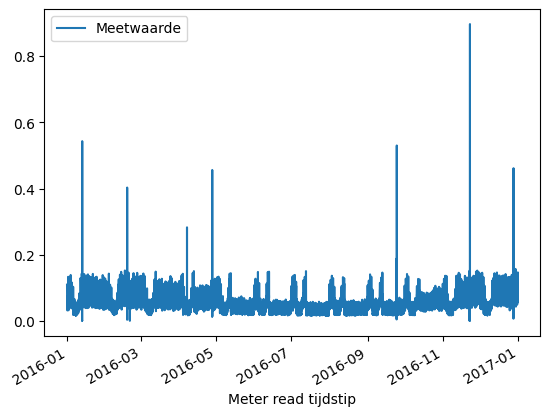

In [6]:
wrong_df = df[['Meter read tijdstip','Meetwaarde']].groupby(['Meter read tijdstip']).mean()
filtered_df.plot()

We can cleary see the errors with the dates here. We also had to filter out some extremely large values. We'll treat these in the preprocessing step.

In [5]:
from dateutil import parser
wrong_date = (df['Meter read tijdstip'].dt.day <= 12)

# Swap the month and day values for the wrong rows
df.loc[wrong_date, 'Meter read tijdstip'] = df.loc[wrong_date, 'Meter read tijdstip'].apply(lambda x: x.replace(month=x.day, day=x.month))
df['Meter read tijdstip'] = df['Meter read tijdstip'].dt.strftime('%Y-%m-%d %H:%M:%S')

<Axes: xlabel='Meter read tijdstip'>

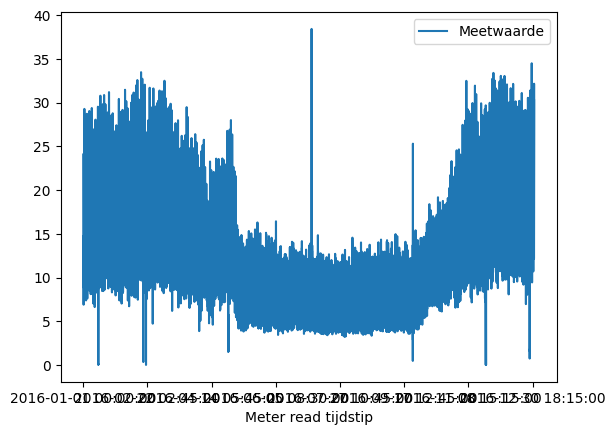

In [32]:
wrong_df = df[['Meter read tijdstip','Meetwaarde']].groupby(['Meter read tijdstip']).sum()
filtered_df = wrong_df[wrong_df['Meetwaarde'] < 40]
filtered_df.plot()

In [33]:
df.to_csv(r'C:\Thesis\data\data2016\raw\READING_2016_FIXED.CSV',sep=';')